In [49]:
include("drive-2D-turbulence-ffts.jl")

main (generic function with 1 method)

In [50]:
tstop = 20.
ntime = 256
preprocess(app, u) = spectralInterpolation(∇X(app, u), 256)'

preprocess (generic function with 1 method)


  Braid: Begin simulation, 256 time steps

  Braid Solver Stats:
  start time = 0.000000e+00
  stop time  = 2.000000e+01
  time steps = 256

  use seq soln?         = 0
  storage               = -1

  max iterations        = 10
  iterations            = 0

  residual norm         = -1.000000e+00
  stopping tolerance    = 1.000000e-06
  use relative tol?     = 0
                                          --> 2-norm TemporalNorm 

  use fmg?              = 0
  access_level          = 2
  print_level           = 2

  max number of levels  = 1
  min coarse            = 2
  number of levels      = 1
  skip down cycle       = 1
  periodic              = 0
  relax_only_cg         = 0
  finalFCRelax          = 0
  tracking timings      = 2
  number of refinements = 0

  level   time-pts   cfactor   nrelax   Crelax Wt
      0       256  

  wall time = 0.973964



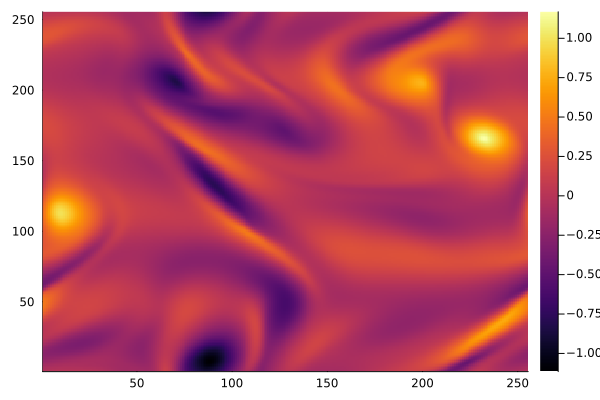

In [55]:
app, core = main(tstop=tstop, ntime=ntime, savegif=false, deltaRank=1)
u_exact = app.solTf[1];
p = sortperm(app.times)
Ψ = app.lyapunov_vecs[p[end]]
heatmap(preprocess(app, app.solTf[1]))

In [61]:
app, core = main(tstop=tstop, ntime=ntime, savegif=false, cf=4, ml=2, maxiter=16,  useTheta=true);


  Braid: Begin simulation, 256 time steps
  Braid: || r_0 || not available, wall time = 8.53e-01
  Braid: || r_1 || = 1.343432e+00, conv factor = 1.00e+00, wall time = 3.18e+00
  Braid: || r_2 || = 1.886873e+00, conv factor = 1.40e+00, wall time = 5.83e+00
  Braid: || r_3 || = 4.832425e-01, conv factor = 2.56e-01, wall time = 8.57e+00
  Braid: || r_4 || = 3.508169e-01, conv factor = 7.26e-01, wall time = 1.12e+01
  Braid: || r_5 || = 2.527479e-01, conv factor = 7.20e-01, wall time = 1.38e+01
  Braid: || r_6 || = 2.172642e-01, conv factor = 8.60e-01, wall time = 1.64e+01
  Braid: || r_7 || = 1.504762e-01, conv factor = 6.93e-01, wall time = 1.90e+01
  Braid: || r_8 || = 7.273979e-02, conv factor = 4.83e-01, wall time = 2.17e+01
  Braid: || r_9 || = 2.157631e-02, conv factor = 2.97e-01, wall time = 2.48e+01
  Braid: || r_10 || = 5.588990e-03, conv factor = 2.59e-01, wall time = 2.77e+01
  Braid: || r_11 || = 1.428031e-03, conv factor = 2.56e-01, wall time = 3.04e+01
  Braid: || r_12 || 

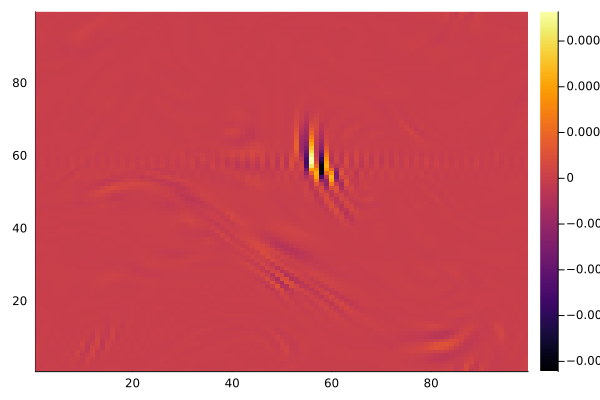

In [62]:
heatmap(∇X(app, app.solTf[end]) - ∇X(app, u_exact))

┌ Info: Saved animation to /tmp/jl_bGH2F0Zwdy.gif
└ @ Plots /home/cadaverous/.julia/packages/Plots/9Q9pN/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_bGH2F0Zwdy.gif")
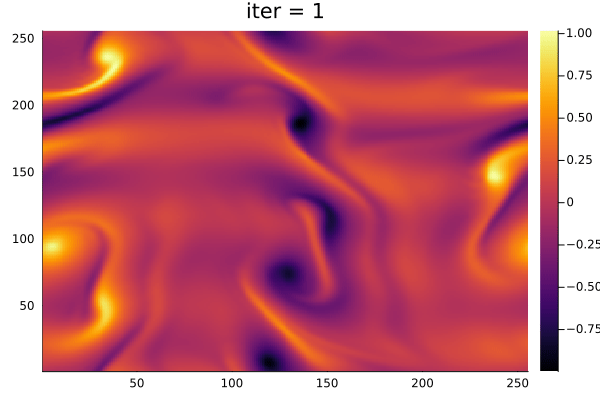

In [63]:
anim = @animate for i in 1:length(app.solTf)
    heatmap(preprocess(app, app.solTf[i]), title="iter = $(i)")
end
gif(anim, fps=2)

┌ Info: Saved animation to /tmp/jl_DQ1YNCN8V4.gif
└ @ Plots /home/cadaverous/.julia/packages/Plots/9Q9pN/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_DQ1YNCN8V4.gif")
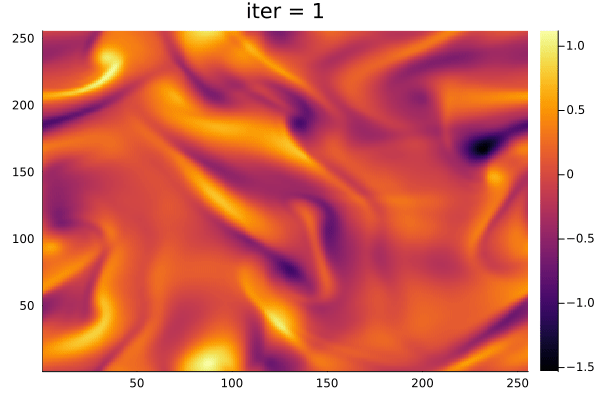

In [64]:
curlexact = preprocess(app, u_exact)
anim = @animate for i in 1:length(app.solTf)
    heatmap(preprocess(app, app.solTf[i]) - curlexact, title="iter = $(i)")
end
gif(anim, fps=2)